In [ ]:
import numpy as np
import pandas as pd
import scipy 
from scipy.stats import multivariate_normal

In [ ]:
# uploading file
from google.colab import files
uploaded = files.upload()

Saving test-Minimum-Error-Rate-Classifier.txt to test-Minimum-Error-Rate-Classifier (1).txt


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['test-Minimum-Error-Rate-Classifier.txt'] ), sep="," ,  header = None, dtype = 'float64')
print(df)

     0    1
0  1.0  1.0
1  1.0 -1.0
2  4.0  5.0
3 -2.0  2.5
4  0.0  2.0
5  2.0 -3.0


In [ ]:
def calculate_likelihood(d, cov_mat, mu, X):
  a1 = np.transpose(X - mu)
  a2 = np.linalg.inv(cov_mat)
  a3 = (X - mu)
  a = np.dot(a1, a2)
  a = np.dot(a, a3)
  a = -0.5*a    
  a = np.exp(a)

  b1 = (2*np.pi)**d
  b2 = np.linalg.det(cov_mat)
  b = np.sqrt(b1*b2)
  
  return a/b

In [ ]:
prior_class_1 = 0.5
prior_class_2 = 0.5
dim = df.shape[1]

cov_mat_1 = np.array([[.25, .3],
                      [.3,  1]])

cov_mat_2 = np.array([[.5, 0],
                      [0, .5]])

mu_1 = np.array([0, 0])
mu_2 = np.array([2, 2])
df = np.array(df)

class_1 = []
class_2 = []

for i in df:
  X = np.array([i[0], i[1]])
  likelihood_1 = calculate_likelihood(dim, cov_mat_1, mu_1, X) * prior_class_1
  likelihood_2 = calculate_likelihood(dim, cov_mat_2, mu_2, X) * prior_class_2 
  if(likelihood_1 > likelihood_2):
    class_1.append(X)
    print(X, '\tis in class 1')
  else:
    class_2.append(X)
    print(X, '\tis in class 2')


[1. 1.] 	is in class 1
[ 1. -1.] 	is in class 1
[4. 5.] 	is in class 2
[-2.   2.5] 	is in class 2
[0. 2.] 	is in class 1
[ 2. -3.] 	is in class 2


In [ ]:
class_1 = pd.DataFrame(class_1)
class_2 = pd.DataFrame(class_2)

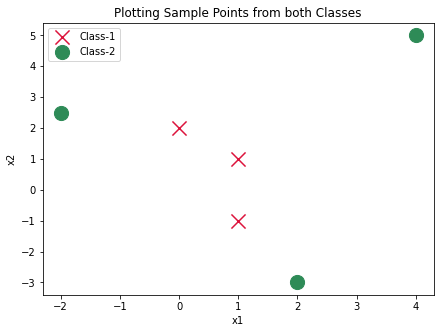

In [ ]:
# Plotting Sample Points from both Classes
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 5)) #width, height
plt.title('Plotting Sample Points from both Classes')
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(class_1[0],class_1[1], s=200, color='crimson', marker = 'x', label='Class-1')
plt.scatter(class_2[0],class_2[1], s=200, color='seagreen', marker = 'o', label='Class-2')
plt.legend()

In [ ]:
X = np.linspace(-4, 4, 500)
Y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(X, Y) 

multivariateNormal = multivariate_normal(mu_1, cov_mat_1)
Z1 = multivariateNormal.pdf(np.dstack((X, Y)))

multivariateNormal = multivariate_normal(mu_2, cov_mat_2)
Z2 = multivariateNormal.pdf(np.dstack((X, Y)))

decision_boundary = Z1-Z2

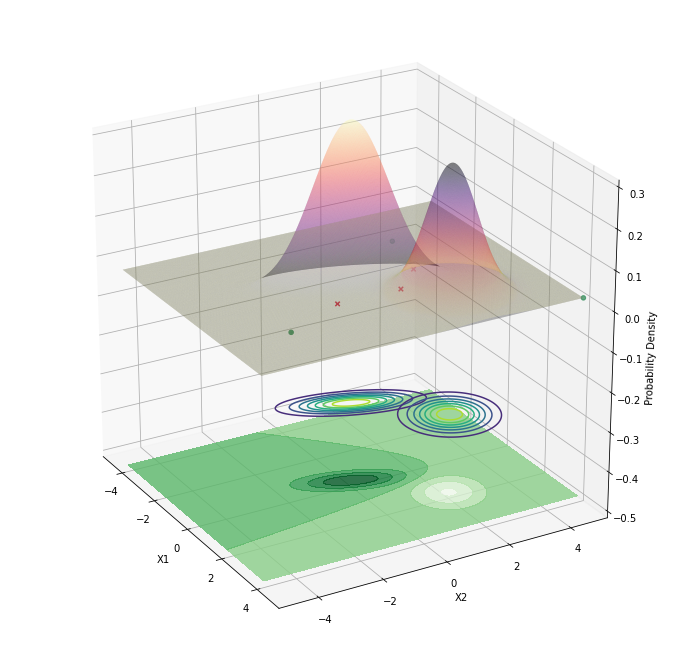

In [ ]:
from matplotlib import cm

fig = plt.figure(figsize = (12, 12))
ax = fig.gca(projection='3d')

# for plotting the distributions - 1st layer
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.magma, alpha=0.3)
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.magma_r, alpha=0.3)

# 2nd layer
cset = ax.contour(X, Y, Z1, zdir='z', offset=-0.3)
cset = ax.contour(X, Y, Z2, zdir='z', offset=-0.3)

# 3rd layer
ax.scatter(class_1[0], class_1[1], marker='x', color='crimson')
ax.scatter(class_2[0], class_2[1], marker='o', color='seagreen')

ax.contourf(X, Y, decision_boundary, zdir='z', offset=-0.5, alpha=0.8, cmap ='Greens')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability Density')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([-.5,.3])

ax.view_init(25, -30)

plt.show()